### Exploration of results

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Source plotting functions
from functions.plotting import signal_shares_lineplot_quarters, signal_shares_lineplot_yearlymean, plot_signal_shares_per_sector

In [4]:
# Read in CIK as string, so that leading zeros are preserved
analyst_ratings = pd.read_csv("../data/sp1500_sell_side_recommendations_ffilled.csv", dtype={"cik": str})

# LLM recommendations with only most recent financial statements
llm_recommendations = pd.read_csv("../data/llm_recommendations_final.csv", dtype={"cik": str})

# Convert date to period format
llm_recommendations["date"] = pd.to_datetime(llm_recommendations["date"]).dt.to_period("M").astype(str)
analyst_ratings["date"] = pd.to_datetime(analyst_ratings["date"]).dt.to_period("M").astype(str)

# Drop duplicates
llm_recommendations.drop_duplicates(subset=["cik", "date"], inplace=True)
analyst_ratings.drop_duplicates(subset=["cik", "date"], inplace=True)

# Read in df with info on economic sectors
sectors = pd.read_csv("../data/sp1500_market_sectors.csv", dtype={"cik": str})
sectors = sectors.drop_duplicates(subset=["cik"])

len(llm_recommendations), len(analyst_ratings)

(120860, 355218)

In [5]:
# Subsetting unique CIK and date combinations from both datasets
llm_ciks_and_dates = llm_recommendations[["cik", "date"]].drop_duplicates()
analyst_ciks_and_dates = analyst_ratings[["cik", "date"]].drop_duplicates() 

# Determine overlap through merge
shared_ciks_and_dates = pd.merge(llm_ciks_and_dates, analyst_ciks_and_dates, on=["cik", "date"], how="inner")

# Only keep CIK date combinations that are in both datasets
llm_recommendations_final = pd.merge(
    llm_recommendations, shared_ciks_and_dates, on=["cik", "date"], how="inner"
)
analyst_ratings_final = pd.merge(
    analyst_ratings, shared_ciks_and_dates, on=["cik", "date"], how="inner"
)
len(llm_recommendations_final), len(analyst_ratings_final)

(113301, 113301)

In [8]:
llm_df = llm_recommendations_final.merge(sectors, on="cik", how="inner")
analyst_df = analyst_ratings_final.merge(sectors, on="cik", how="left")
len(llm_df), len(analyst_df)

(113301, 113301)

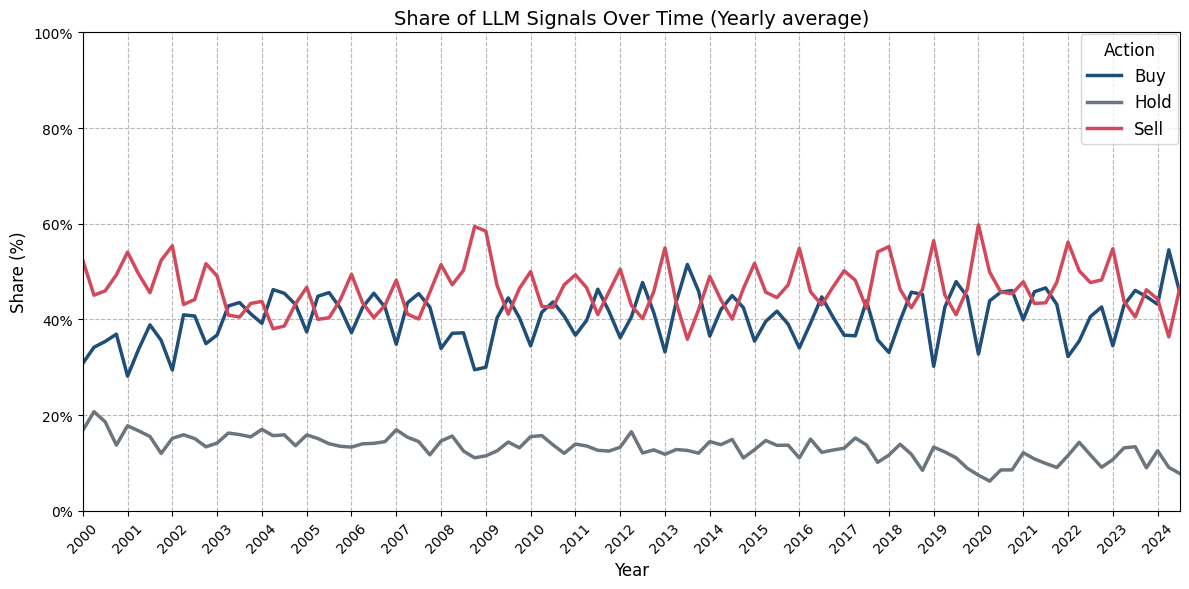

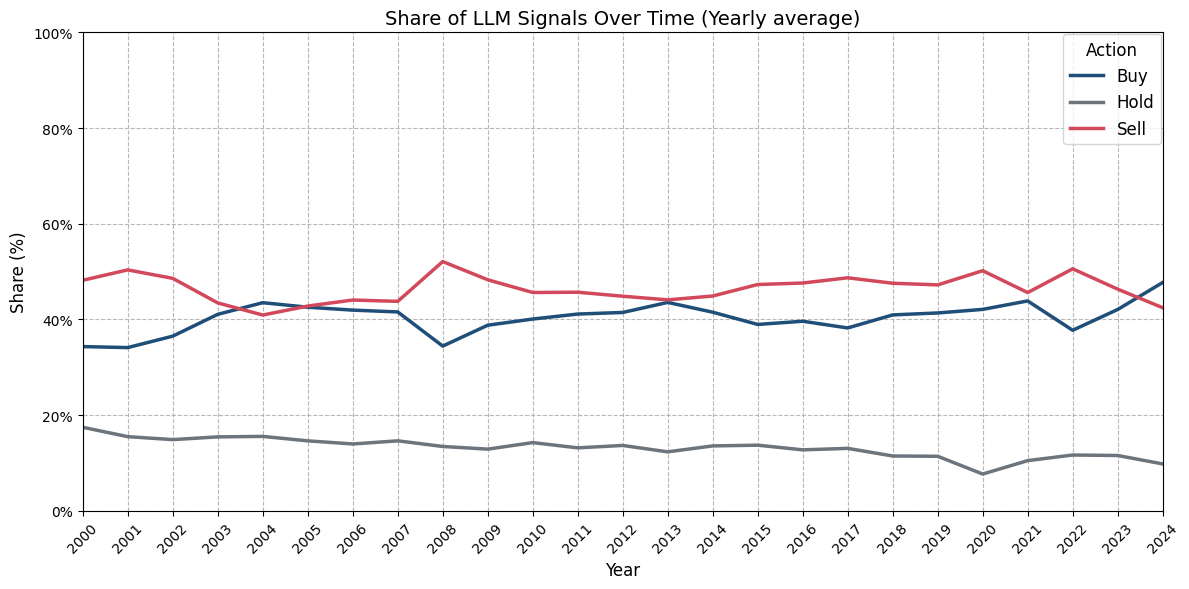

(None, None)

In [10]:
signal_shares_lineplot_quarters(llm_df), signal_shares_lineplot_yearlymean(llm_df)

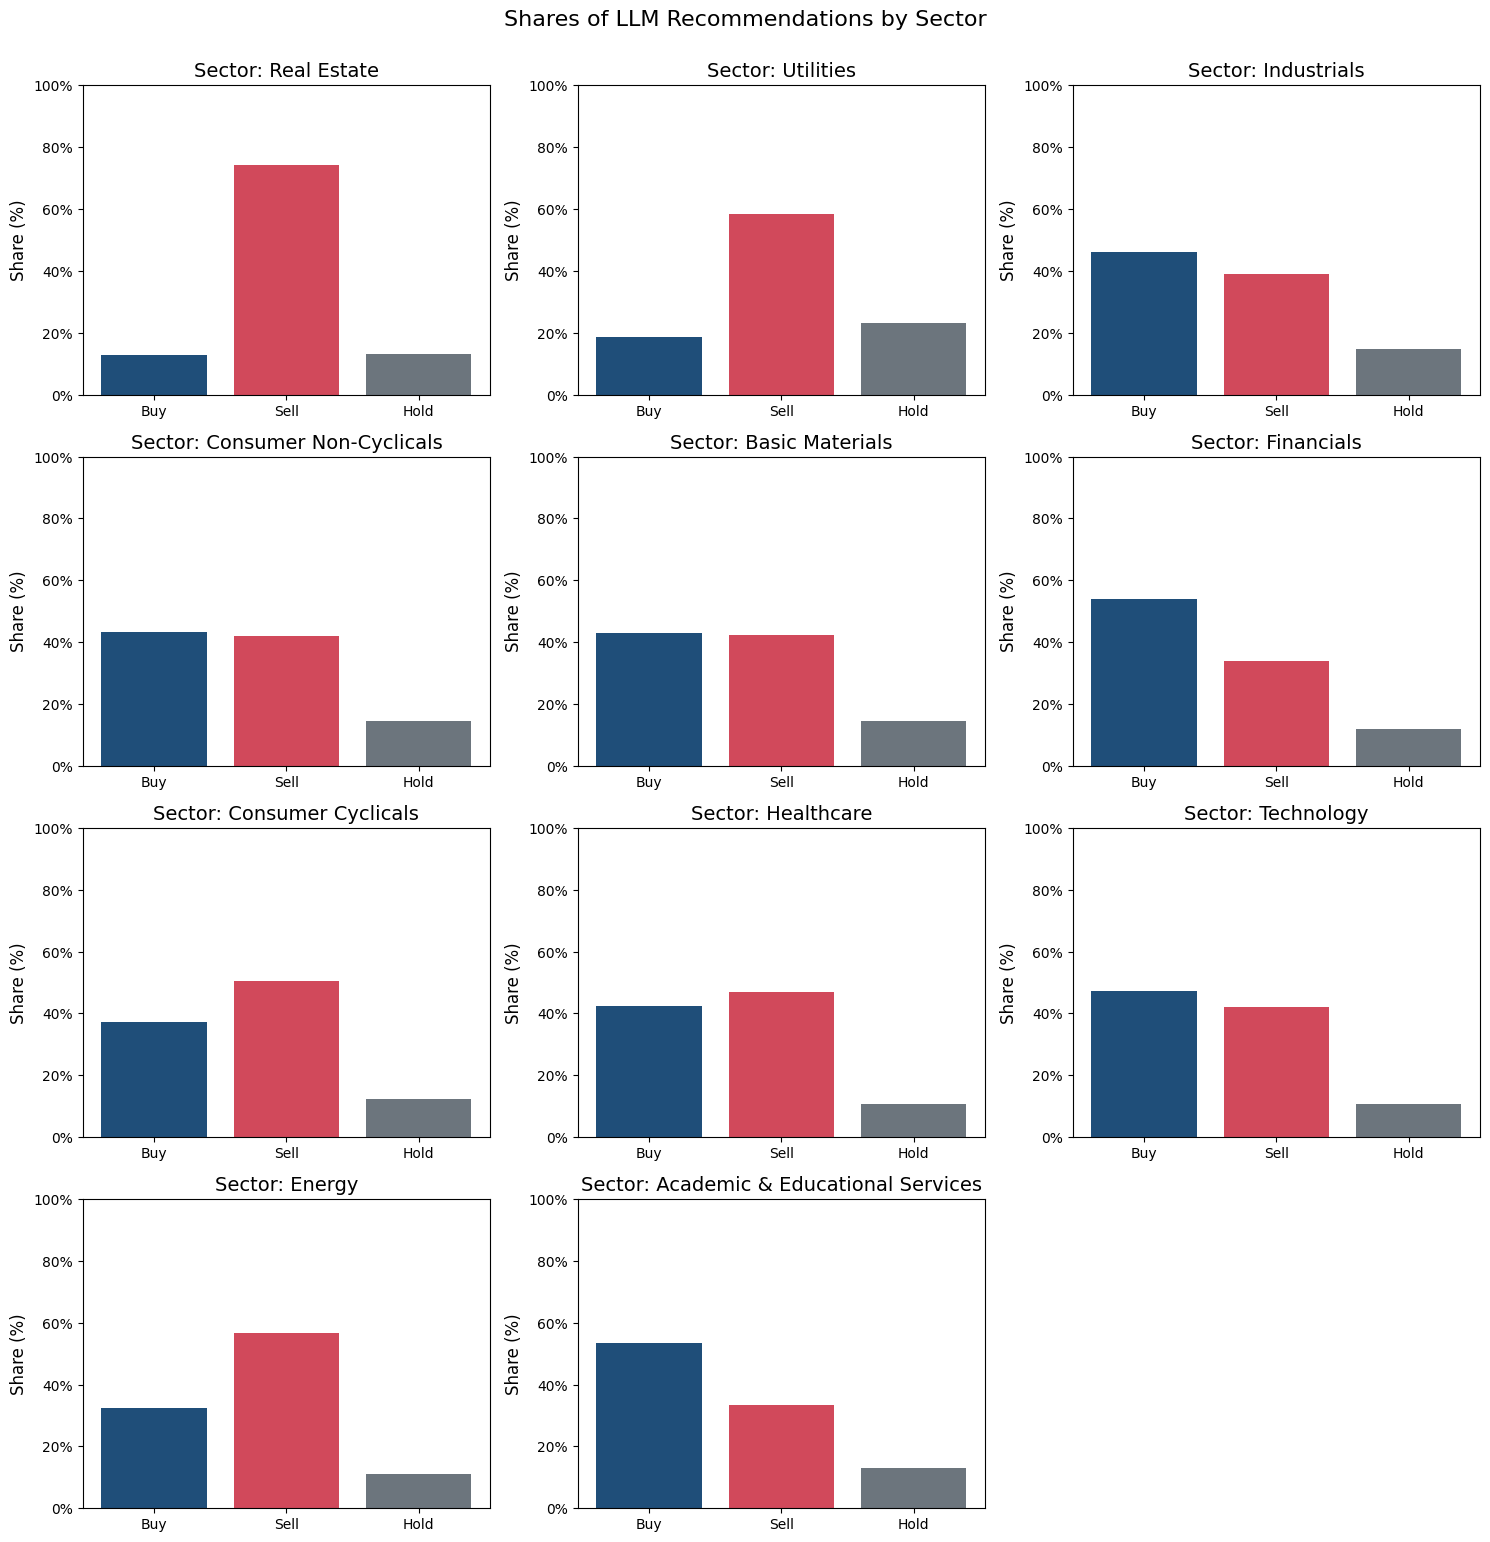

In [11]:
plot_signal_shares_per_sector(llm_df)